In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('hs_about.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- longitude = Boylam
- latitude = Enlem
- housing_median_age = Konut medyan yaşı
- total_rooms = Toplam odalar
- total_bedrooms = Toplam yatak odalar
- population = Nüfus
- households = Hanehalkı
- median_income = Medyan gelir
- median_house_value = Medyan ev değeri
- ocean_proximity = Okyanus yakınlığı

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


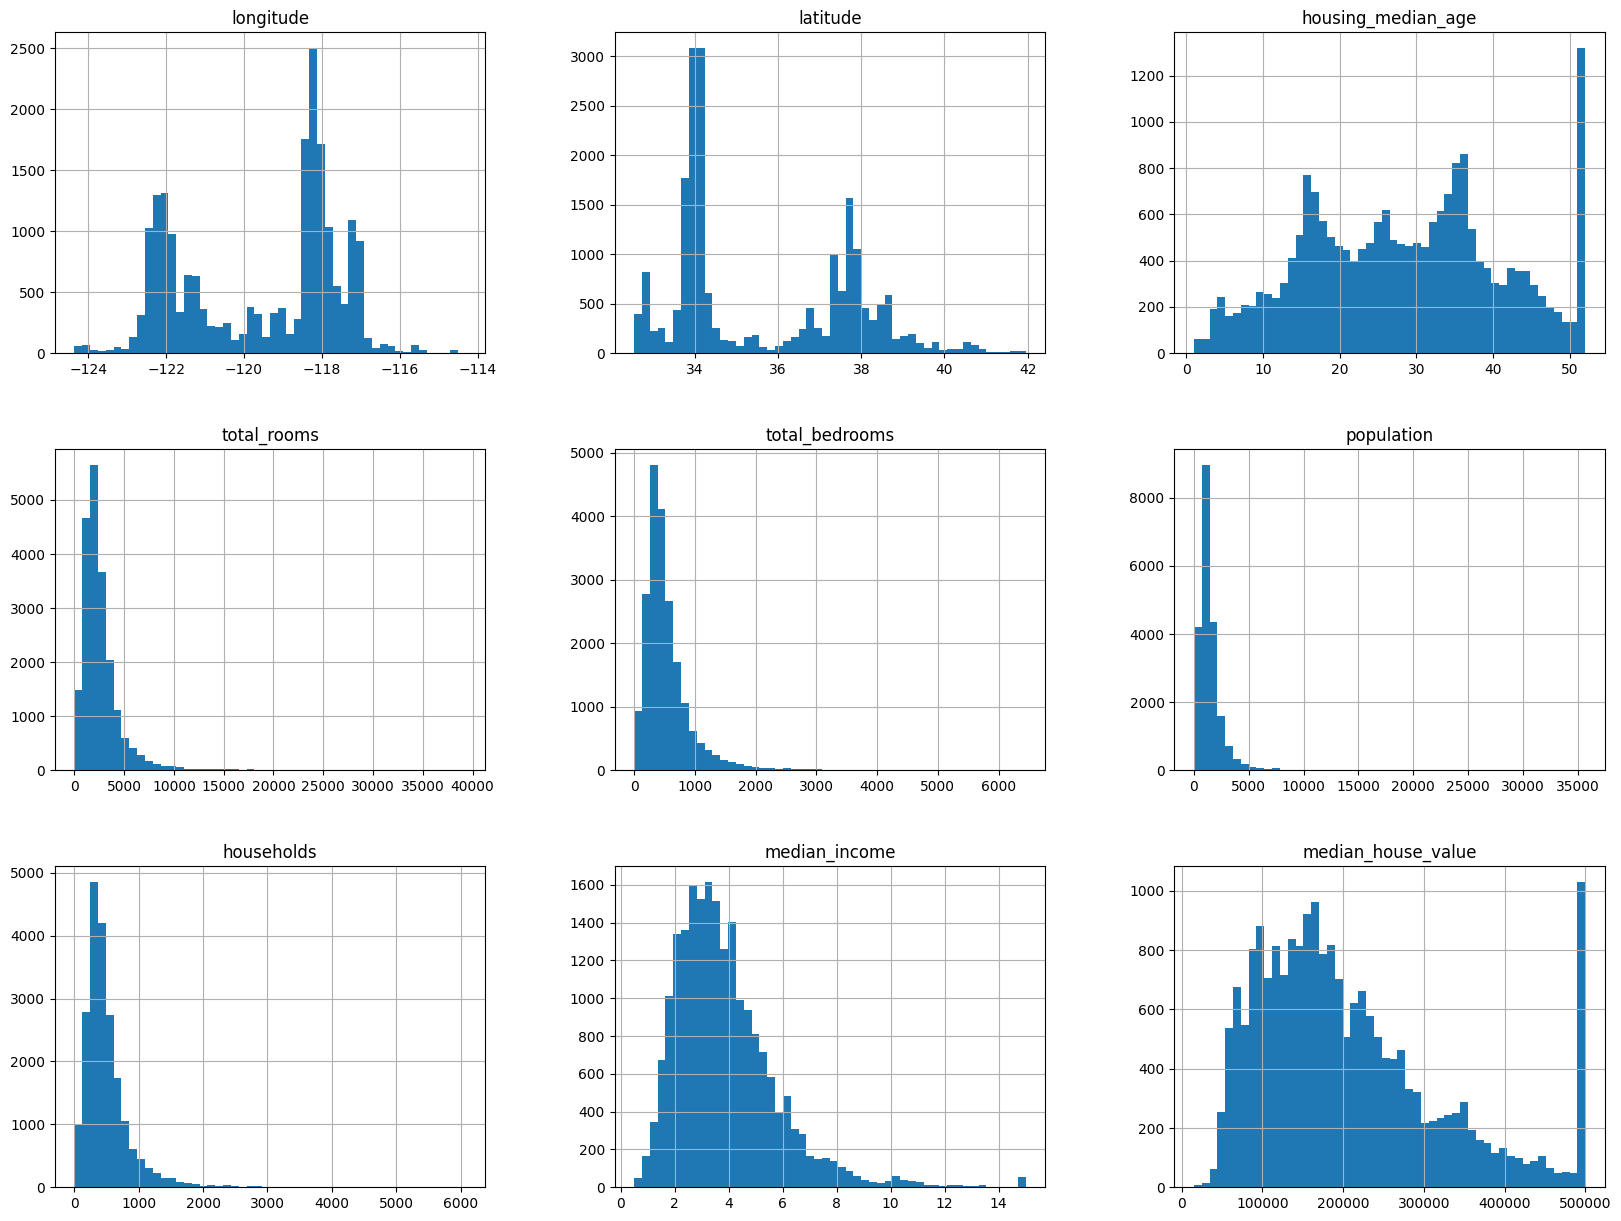

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


- Eksik gözlem bulunan total_bedrooms ile housesold kolonları arasında bir korelasyon gözlemliyoruz. totel_bedrooms'un boş değerlerine karşılık gelen housesold sütunundaki değerleri boş değerlere alabiliriz.

### İfademizi daha iyi yorumlamak için iki sütunuda görselleştirelim

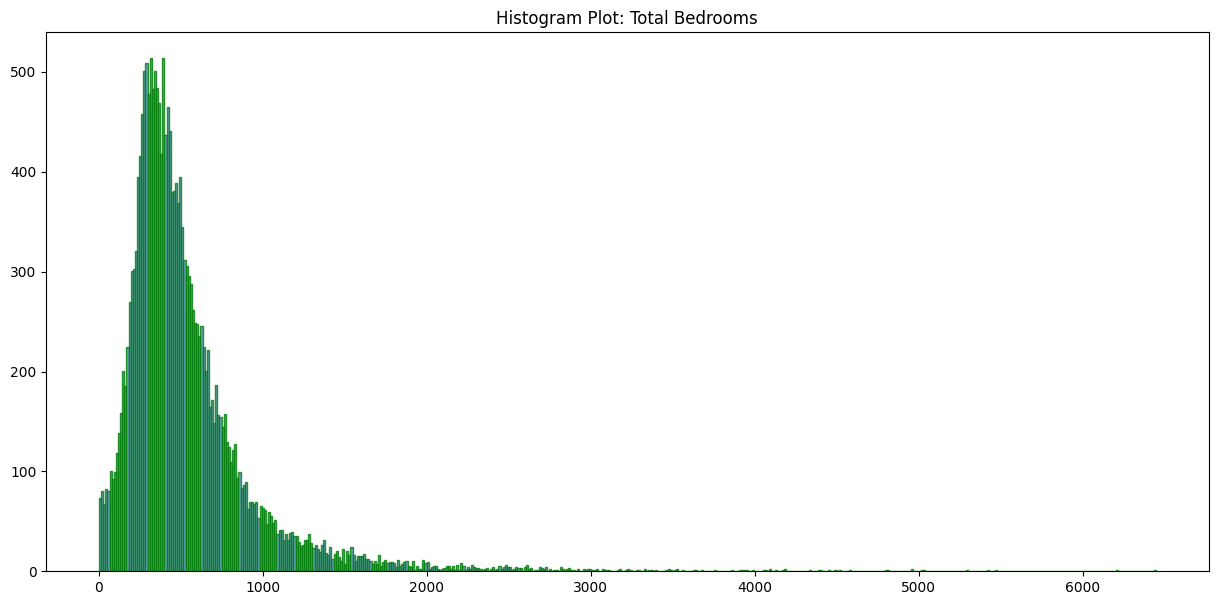

In [8]:
plt.subplots(figsize=(15, 7))

plt.title('Histogram Plot: Total Bedrooms')

total_bedrooms = df['total_bedrooms']

plt.hist(total_bedrooms, bins=500, alpha=0.8,
         histtype='bar', color='steelblue',
         edgecolor='green')

plt.show()

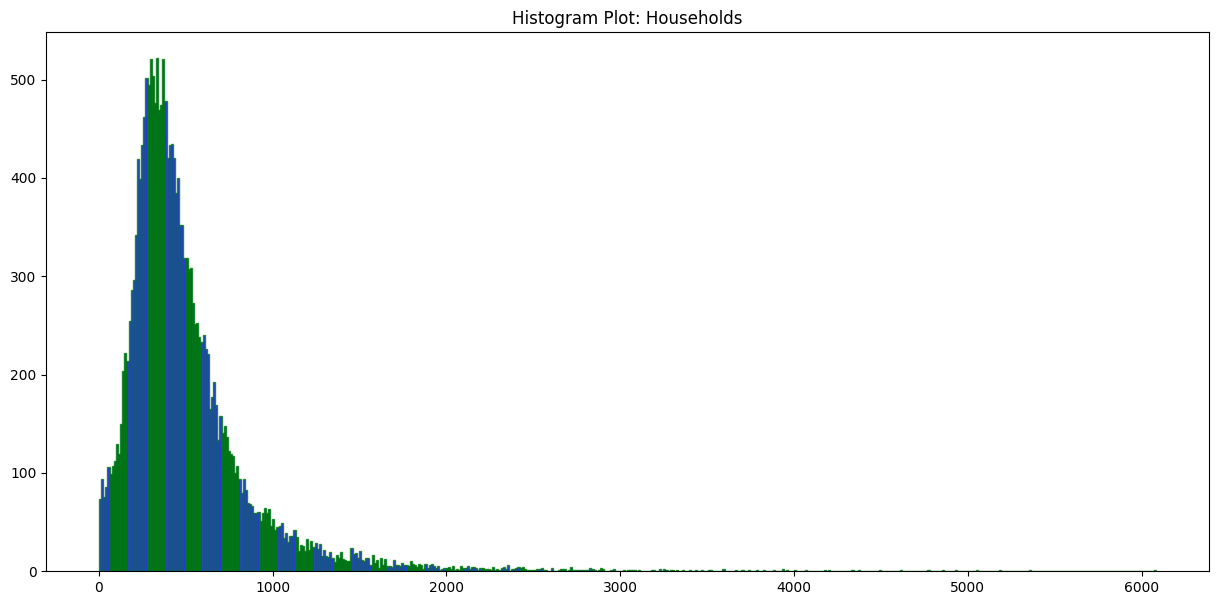

In [9]:
plt.subplots(figsize=(15, 7))
             
plt.title('Histogram Plot: Households')
             
households = df['households']
             
plt.hist(households, bins=500, alpha=0.8,
         histtype='bar', color='blue',
         edgecolor='green')
             
plt.show()

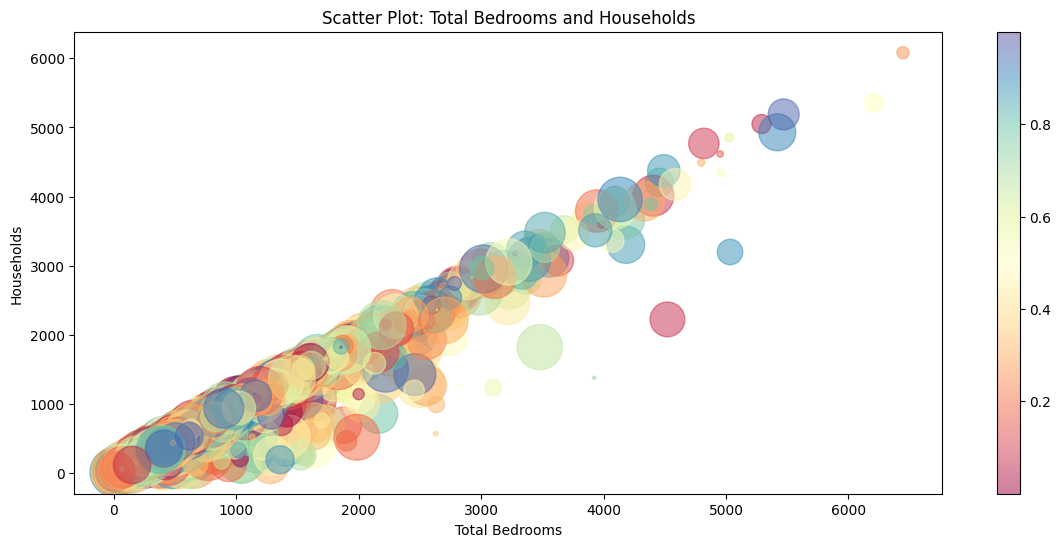

In [10]:
plt.figure(figsize=(14,6))

plt.rcParams['axes.grid'] = False

plt.title('Scatter Plot: Total Bedrooms and Households')

N = households.size
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N)) ** 2

plt.xlabel('Total Bedrooms')
plt.ylabel('Households')

plt.scatter(total_bedrooms, households, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()


In [11]:
# Varyans
var_tb = (np.square(total_bedrooms - total_bedrooms.mean())).sum() / (df.shape[0] - 1)
var_hh = (np.square(households - households.mean())).sum() / (df.shape[0] -1)
print(f'Variance of: (total bedrooms: {var_tb}, households: {var_hh})')

Variance of: (total bedrooms: 175784.4754402569, households: 146176.03990028054)


In [12]:
sd_tb = np.sqrt(var_tb)
sd_hh = np.sqrt(var_hh)
print(f'Standart deviation of; (total bedrooms: {sd_tb}, households: {sd_hh})')

Standart deviation of; (total bedrooms: 419.26659232552373, households: 382.32975283161073)


In [13]:
import scipy.stats as stats

tstat, pvalue = stats.ttest_ind_from_stats(total_bedrooms.mean(), sd_tb, total_bedrooms.size, households.mean(), sd_hh, households.size)
print(f't score: {tstat}, p score: {pvalue}')

t score: 9.705149779887096, p score: 3.0279724591955457e-22


### Iki kolon arasindaki korelasyona bakalim;

In [14]:
cov =((total_bedrooms - total_bedrooms.mean()) * (households - households.mean())).sum() / (df.shape[0] -1)
cov

156246.54825893574

In [15]:
corr = cov / (sd_tb * sd_hh)
corr

0.974724937213194

In [16]:
df[['total_bedrooms', 'households']].corr()

,total_bedrooms,households
total_bedrooms,1.000000,0.979728
households,0.979728,1.000000


- tb ve hh sutunlari arasinda pozitif yonde cok guclu bir iliski vardir. H0 hipotezimizi reddetmemize ragmen guclu bir korelasyon oldugu icin tb sutunundaki eksik degerleri hh sutunundaki karsilik gelen degerlerle degistirebiliriz.

## Null Values

- tb sutunundaki bos degerlerin dizinlerini bulma ve bunlari bos bir listeye ekleme.

In [17]:
null_indexes = []

for (i, v) in df['total_bedrooms'].iteritems():
    if pd.isna(v):
        null_indexes.append(i)
print(null_indexes)

[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

- tb sutunundaki bos degerlere karsilik gelen hh sutunundaki degerleri bulmak icin;

In [18]:
values = []

for i in range(len(null_indexes)):
    values.append(df['households'].iloc[null_indexes[i]])
print(values)
    

[218.0, 259.0, 1273.0, 146.0, 161.0, 557.0, 600.0, 1012.0, 540.0, 499.0, 626.0, 372.0, 1260.0, 928.0, 580.0, 224.0, 292.0, 243.0, 257.0, 669.0, 266.0, 91.0, 16.0, 584.0, 310.0, 902.0, 769.0, 623.0, 1200.0, 550.0, 737.0, 1492.0, 1280.0, 403.0, 677.0, 155.0, 528.0, 294.0, 312.0, 726.0, 422.0, 439.0, 290.0, 1179.0, 682.0, 1462.0, 439.0, 516.0, 187.0, 271.0, 475.0, 292.0, 245.0, 749.0, 231.0, 476.0, 302.0, 403.0, 771.0, 441.0, 339.0, 326.0, 530.0, 328.0, 727.0, 500.0, 497.0, 403.0, 1251.0, 474.0, 257.0, 155.0, 1012.0, 622.0, 357.0, 552.0, 221.0, 120.0, 452.0, 427.0, 1196.0, 212.0, 248.0, 629.0, 269.0, 130.0, 219.0, 270.0, 951.0, 287.0, 130.0, 1483.0, 132.0, 257.0, 112.0, 428.0, 393.0, 67.0, 72.0, 439.0, 437.0, 276.0, 423.0, 762.0, 541.0, 218.0, 522.0, 183.0, 622.0, 499.0, 351.0, 242.0, 1063.0, 996.0, 606.0, 512.0, 186.0, 1176.0, 202.0, 562.0, 281.0, 627.0, 375.0, 843.0, 611.0, 358.0, 107.0, 391.0, 532.0, 158.0, 375.0, 592.0, 201.0, 539.0, 390.0, 108.0, 499.0, 426.0, 268.0, 687.0, 246.0, 10

- Simdi bu degerleri tb sutnundaki bos degerlerin yerine aktaracagiz;

In [19]:
index = 0

for (i, v) in df['total_bedrooms'].iteritems():
    if pd.isna(v):
        df['total_bedrooms'].iloc[i] = values[index]
        index += 1

- tb sutunundaki null degerler kalmis mi kontrol edelim;

In [20]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Kategorik degerleri analiz etme;

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- ocean_proximity koloununun kategorik oldugunu goruyoruz

- Daha iyi analiz etmek icin bu sutunu gorsellestirelim.

***Not:*** ocean_proximity'den o_c diye bahsedilecek

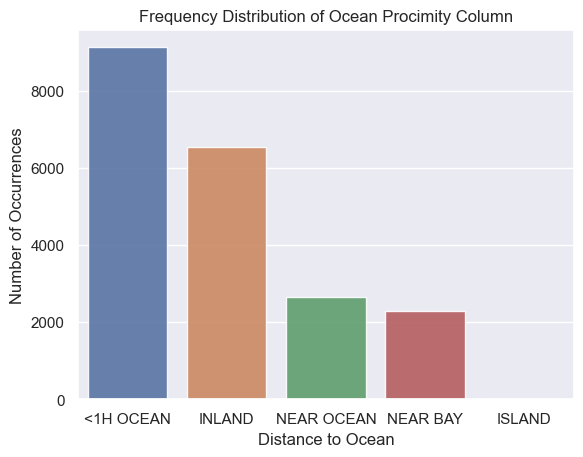

In [23]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

distance_count = df['ocean_proximity'].value_counts()
sns.set(style='darkgrid')
sns.barplot(distance_count.index, distance_count, alpha=0.9)
plt.title('Frequency Distribution of Ocean Procimity Column')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Distance to Ocean', fontsize=12)
plt.show()

- o_c sutununun pasta grafigi gosterimi;

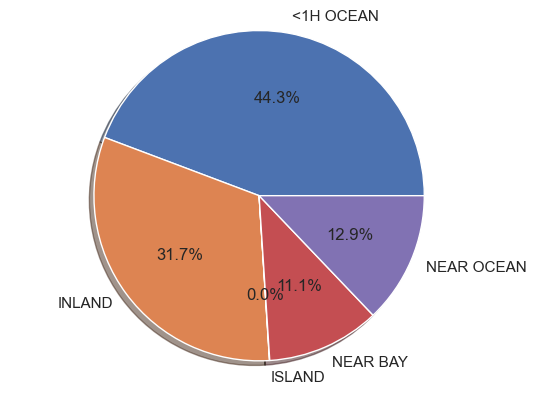

In [24]:
labels = df['ocean_proximity'].astype('category').cat.categories.tolist()
counts = df['ocean_proximity'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [25]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- o_c sutununda 5 ozellik oldugundan bunlari sayisal degerler ile gosterebiliriz. Bu sayisal degerleride puanlama olarak siralayacagiz. Yani;

<1H OCEAN < INLAND < NEAR OCEAN < NEAR BAY < ISLAND

- Kodladigimiz ozellerikleri ve karsilik gelen degerleri iceren bir dic yapisi olusturalim;

In [26]:
replace_map = {'ocean_proximity' : {'<1H OCEAN': 1, 'INLAND' : 2, 'NEAR OCEAN' : 3, 'NEAR BAY' : 4, 'ISLAND' : 5}}

In [27]:
df_replace = df.copy()
df_replace.replace(replace_map, inplace=True)
df_replace.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


## Aykırı değer tespiti;

- Aykırı değerler z skoru kullnarak tespit ediyoruz ve 2 adımda hesaplıyoruz.

- (x-ortalama)/std formülü kullanılarak z skoru hesaplanır
- 3 eşik değeri tanımlayın ve z skoru mutlak değer olarak işaretlerin

In [51]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std)
    for i in data:
        z_score = (i - mean) / std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [52]:
sample_outliers = []

for i in range(len(df_replace.count()) - 1):
    sample_outliers.append(detect_outliers_zscore(df_replace.iloc[:,i]))

-119.56970445736432 2.003483187746976
35.63186143410853 2.135900653797483
28.639486434108527 12.585252725724606
2635.7630813953488 2181.5624017359723
537.5912790697674 421.0364119359314
1425.4767441860465 1132.434687757615
499.5396802325581 382.3204908552571
3.8706710029069766 1.8997756945748738
206855.81690891474 115392.82040412253


In [56]:
def replace_outliers(data, sample_index):
    median = np.median(data)
    index = 0
    if len(sample_outliers[sample_index]) == 0:
        return
    for (i, v) in data.iteritems():
        if sample_outliers[sample_index][index] == v:
            data[i] = median
            if index < len(sample_outliers[sample_index]) - 1:
                index += 1
    

In [57]:
df_outliers = df_replace.copy()
for i in range(len(sample_outliers)):
    replace_outliers(df_outliers.iloc[:, i], i)

In [61]:
df_1 = pd.DataFrame(df_replace.mean(), columns=['Mean with outliers'])
df['Mean with outliers'] = df_outliers.mean()
df_1

,Mean with outliers
longitude,-119.569704
latitude,35.631861
housing_median_age,28.639486
total_rooms,2635.763081
total_bedrooms,537.591279
population,1425.476744
households,499.539680
median_income,3.870671
median_house_value,206855.816909
ocean_proximity,1.908769


In [64]:
df_2 = pd.DataFrame(df_replace.median(), columns=['Median without outliers'])
df['Median without'] = df_outliers.median()
df_2

,Median without outliers
longitude,-118.4900
latitude,34.2600
housing_median_age,29.0000
total_rooms,2127.0000
total_bedrooms,435.0000
population,1166.0000
households,409.0000
median_income,3.5348
median_house_value,179700.0000
ocean_proximity,2.0000


#### Veri siralama
- Q1 ve Q3'u hesaplayin
- IQR'yi Bul (Q3 - Q1)
- Alt siniri bulun(Q1 - 1,5 * IQR)
- Ust siniri bulun(Q3 + 1,5 * IQR)

<AxesSubplot:xlabel='median_house_value'>

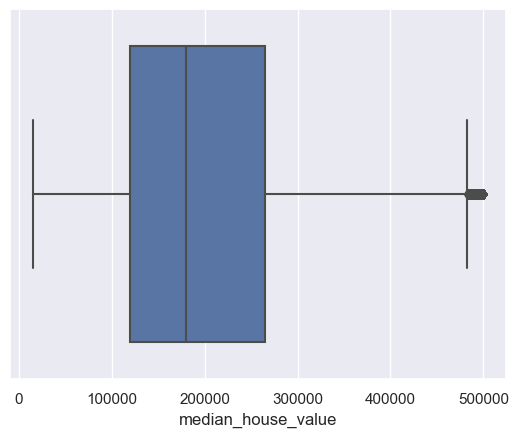

In [65]:
def decet_outliers_iqr(dataset):
    outliers = []
    dataset = sorted(dataset)
    q1,q3 = np.percentile(dataset, [25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    for elem in dataset:
        if elem < lower_fence or elem > upper_fence:
            outliers.append(elem)
    return outliers

import seaborn as sns

sns.boxplot(df['median_house_value'])

## Model Secimi

In [67]:
cols =  ['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms', 
        'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value' ]
dataset = df_outliers.copy()
dataset = dataset[cols]

dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,4,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,4,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,4,342200.0


In [68]:
X = dataset.iloc[:, 0:9].values
Y = dataset.iloc[:, 9].values

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [72]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

regressor = RandomForestRegressor(n_estimators = 100, max_features = 0.5)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

time_end = time.time()
print(f'Run time : {time_end - time_start}')

Run time : 11.267090559005737


In [78]:
from sklearn import metrics

print('Training Score: ', regressor.score(X_train, Y_train))
print('Testing Score: ', regressor.score(X_test, Y_test))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Training Score:  0.9753237262976838
Testing Score:  0.8233962487234932
Root Mean Squared Error:  48129.982701851986
